In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


###  Linear Regression and Multiple Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lm = LinearRegression()
lm

LinearRegression()

### How could Highway-mpg help us predict car price?

In [60]:
X = df[['highway-mpg']]
Y = df[['price']]

In [61]:
lm.fit(X, Y)

LinearRegression()

In [62]:
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

### What is the value of the intercept (a)?

In [63]:
lm.intercept_

array([38423.30585816])

### What is the value of the Slope (b)?

In [64]:
lm.coef_

array([[-821.73337832]])

### Create a linear regression object?

### Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable?

In [65]:
lm1 = LinearRegression()
x1 = df[['engine-size']]
y1 = df[['price']]

lm1.fit(x1, y1)

LinearRegression()

In [66]:
yhat1 = lm1.predict(x1)
yhat1[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [67]:
lm1.intercept_

array([-7963.33890628])

In [68]:
lm1.coef_

array([[166.86001569]])

### Multiple Linear Regression

Let's develop a model using below variables as the predictor variables.

- Horsepower
- Curb-weight
- Engine-size
- Highway-mpg


In [69]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22
...,...,...,...,...
196,114.0,2952,141,28
197,160.0,3049,141,25
198,134.0,3012,173,23
199,106.0,3217,145,27


In [70]:
lm.fit(Z, df['price'])

LinearRegression()

In [71]:
lm.intercept_

-15806.624626329198

In [72]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [74]:
Yhat = lm.predict(Z)
Yhat[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

### Create and train a Multiple Linear Regression model "lm2" where the response variable is price, and the predictor variable is 'normalized-losses' and 'highway-mpg'.

In [34]:
lm2 = LinearRegression()

In [35]:
z2 = df[['normalized-losses', 'highway-mpg']]

In [37]:
lm2.fit(z2, df['price'])

LinearRegression()

In [40]:
Yhat2 = lm2.predict(z2)
Yhat2[0:5]

array([16231.78938339, 16231.78938339, 17052.24372355, 13833.33798916,
       20396.97271047])

In [41]:
lm2.intercept_

38201.31327245728

In [42]:
lm2.coef_

array([   1.49789586, -820.45434016])

### Model Evaluation using Visualization

In [43]:
import seaborn as sns
%matplotlib inline

### Regression Plot

#### Let's visualize highway-mpg as potential predictor variable of price:

(0.0, 48180.82835592105)

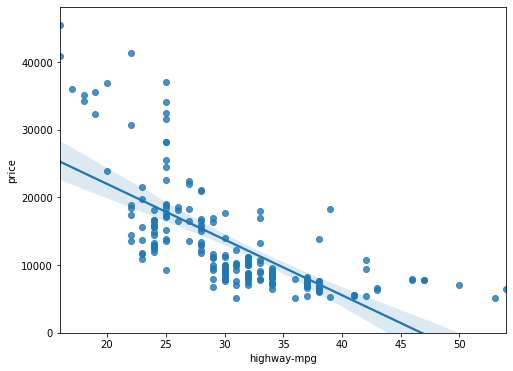

In [50]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data = df)
plt.ylim(0,)

#### Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

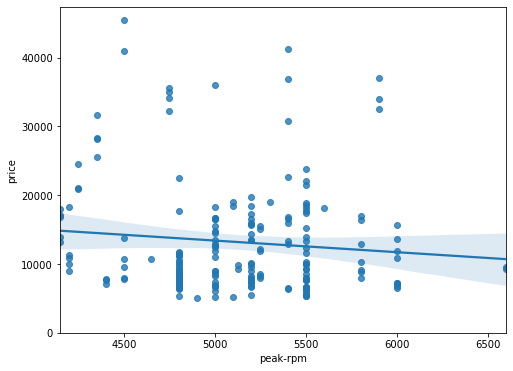

In [51]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

#### Given the regression plots above is "peak-rpm" or "highway-mpg" more strongly correlated with "price". Use the method ".corr()" to verify your answer.

In [52]:
df[["peak-rpm", "highway-mpg", "price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Residual Plot

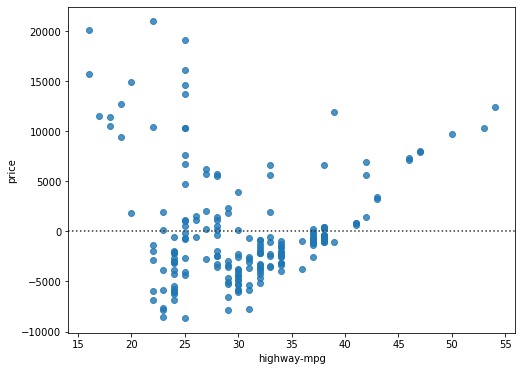

In [53]:
plt.figure(figsize=(width, height))
sns.residplot(x="highway-mpg", y="price", data=df)
plt.show()

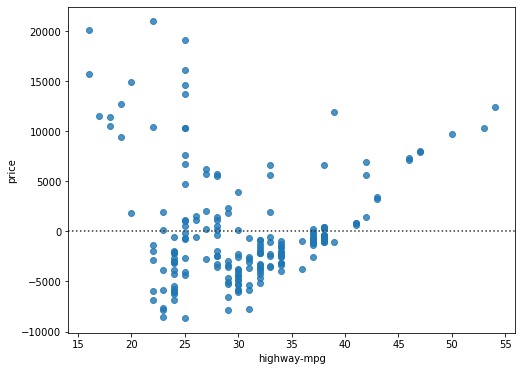

In [54]:
plt.figure(figsize=(width, height))
sns.residplot(x=df["highway-mpg"], y=df["price"])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

#### Multiple Linear Regression

How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

C:\Users\sspnia\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sspnia\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


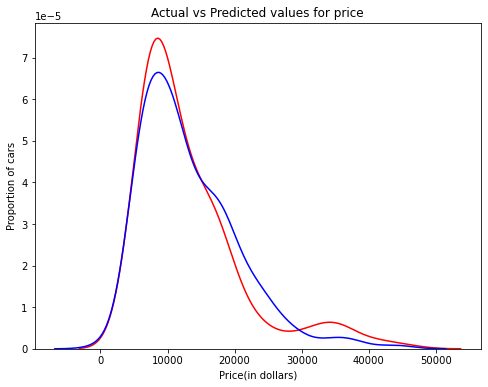

In [81]:
# Yhat = lm.predict(Z)

plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color='r', label="Actual values")
sns.distplot(Yhat, hist=False, color='b', label = "Predicted values" , ax=ax1)

plt.title("Actual vs Predicted values for price")
plt.xlabel("Price(in dollars)")
plt.ylabel("Proportion of cars")

plt.show()
plt.close()

### Polynomial Regression and Pipelines

We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

In [92]:
x = df['highway-mpg']
y = df['price']

In [99]:
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [132]:
def plotpoly(model, indep_var, dep_var, name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(x, y, '.', x_new, y_new, '-')
    plt.xlabel('highway-mpg')
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()

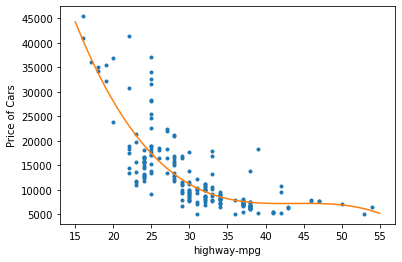

In [133]:
plotpoly(p, x, y, 'highway-mpg')

### Create 11 order polynomial model with the variables x and y from above?

In [ ]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)

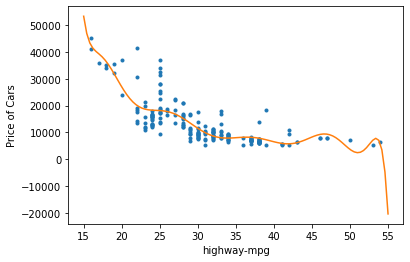

In [136]:
plotpoly(p1, x, y, 'highway-mpg')

### Perform a polynomial transform on multiple features. First, we import the module:

In [137]:
from sklearn.preprocessing import PolynomialFeatures

In [141]:
pr = PolynomialFeatures(degrees=2)
pr

PolynomialFeatures()

In [143]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z_pr = pr.fit_transform(Z)

Z_pr

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 2.3104e+04, 3.9520e+03,
        6.7600e+02],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 2.9929e+04, 3.9790e+03,
        5.2900e+02],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 2.1025e+04, 3.9150e+03,
        7.2900e+02],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 1.9881e+04, 3.5250e+03,
        6.2500e+02]])

### Pipeline

In [146]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [147]:
Input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [148]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [149]:
pipe.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [154]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

### Measures for In-Sample Evaluation

### Model1: Simple Linear Regression

In [158]:
lm = LinearRegression()
X = df[['highway-mpg']]
Y = df[['price']]
lm.fit(X, Y)

print('The R-square is: ', lm.score(X,Y))

The R-square is:  0.4965911884339175


We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

In [159]:
Yhat = lm.predict(X)

print('The output of the first 4 predicted value is', Yhat[0:4])

The output of the first 4 predicted value is [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


In [160]:
from sklearn.metrics import mean_squared_error

In [164]:
mse = mean_squared_error(df[['price']], Yhat)

print('The mean squared error of price and predicted value is:',  mse)

The mean squared error of price and predicted value is: 31635042.944639895


In [165]:
mse = mean_squared_error(df['price'], Yhat)

print('The mean squared error of price and predicted value is:',  mse)

The mean squared error of price and predicted value is: 31635042.944639895


### Model 2: Multiple Linear Regression

In [168]:
lm.fit(Z, df[['price']])

print('The R-square is: ', lm.score(Z, df[['price']]))

The R-square is:  0.8093562806577457


In [172]:
Yhat_multi = lm.predict(Z)

print("The output of the first 4 predicted value is: ", Yhat_multi[0:4])

The output of the first 4 predicted value is:  [13699.11161184 13699.11161184 19051.65470233 10620.36193015]


In [173]:
print("The mean squared error of price and predicted value is:", mean_squared_error(df[['price']], Yhat_multi))

The mean squared error of price and predicted value is: 11980366.87072649


### Model 3: Polynomial Fit

In [174]:
from sklearn.metrics import r2_score

In [183]:
x = df['highway-mpg']
y = df['price']

f = np.polyfit(x, y, 3)
p = np.poly1d(f)

r_squared = r2_score(y, p(x))
print("The R-square value is: ", r_squared)

print("The mse is: ", mean_squared_error(df['price'], p(x)))

The R-square value is:  0.674194666390652
The mse is:  20474146.426361218


### Prediction and Decision Making
### Prediction

In [190]:
new_input = np.arange(1,100, 1).reshape(-1,1)

lm.fit(X, Y)
lm

LinearRegression()

In [193]:
Yhat = lm.predict(new_input)
Yhat[0:5]

array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

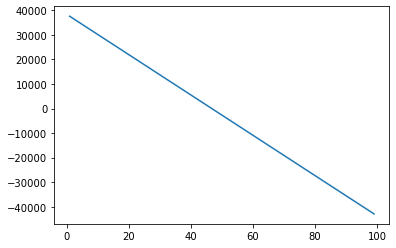

In [195]:
plt.plot(new_input, Yhat)
plt.show()

### Decision Making: Determining a Good Model Fit

- What is a good R-squared value?

When comparing models, the model with the higher R-squared value is a better fit for the data.

- What is a good MSE?

When comparing models, the model with the smallest MSE value is a better fit for the data.

#### Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.49659118843391759

MSE: 3.16 x10^7

#### Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

R-squared: 0.80896354913783497

MSE: 1.2 x10^7

#### Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.6741946663906514

MSE: 2.05 x 10^7

#### Conclusion:
    
Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.